In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

ImportError: cannot import name 'MaxMinScaler'

In [3]:
houseData = pd.read_csv('kc_house_data.csv')
houseData.dropna(how='any',inplace=True)
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
houseData['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

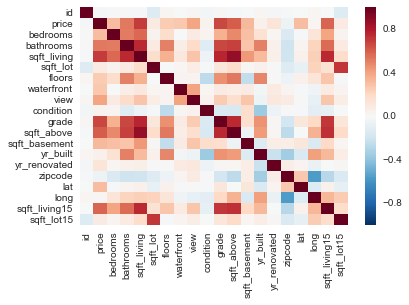

In [5]:
corrmat = houseData.corr()
sns.heatmap(corrmat)
plt.show()

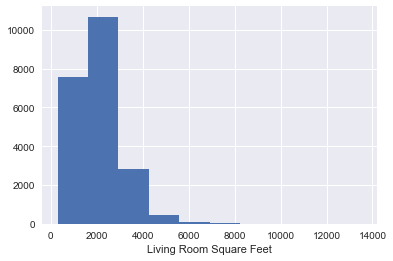

In [6]:
plt.hist(houseData['sqft_living'])
plt.xlabel('Living Room Square Feet')
plt.show()

In [16]:
features = pd.DataFrame()
def sizer(x):
    if 0 < x < 2000:
        return int(1)
    elif 2000 <= x < 4000:
        return int(2)
    elif x > 4000:
        return int(3)
features['living_size'] = houseData['sqft_living'].apply(sizer)

features['tot_bed_bath'] = houseData['bedrooms'] + houseData['bathrooms']

features['overall'] = houseData['condition'] * houseData['grade']

features['surroundings'] = houseData['view'] + houseData['waterfront']

features['basement_creepiness'] = houseData['sqft_basement'] / houseData['yr_built']

features['sqft_per_floor'] = houseData['sqft_lot'] / houseData['floors']

features['room_size'] = (houseData['sqft_living'] + houseData['sqft_above']) / (houseData['bedrooms'] + houseData['bathrooms'])

features['age'] = 2017 - houseData['yr_built']

features['renovation_age'] = 2017 - houseData['yr_renovated']

def region(x):
    if x < 47.4:
        return 'south'
    if 47.4 <= x < 47.6:
        return 'central'
    if x > 47.6:
        return 'north'
    
features['region'] = houseData['lat'].apply(region)

dummies = pd.get_dummies(features['region'])

features = pd.concat([features, dummies], axis=1)
#features['school_dist_rank'] = (1 for this zipcode)
features.head()

,living_size,tot_bed_bath,overall,surroundings,basement_creepiness,sqft_per_floor,room_size,age,renovation_age,region,central,north,south
0,1.0,4.00,21,0,0.000000,5650.0,590.000000,62,2017,central,1,0,0
1,2.0,5.25,21,0,0.205023,3621.0,902.857143,66,26,north,0,1,0
2,1.0,3.00,18,0,0.000000,10000.0,513.333333,84,2017,north,0,1,0
3,1.0,7.00,35,0,0.463104,5000.0,430.000000,52,2017,central,1,0,0
4,1.0,5.00,24,0,0.000000,8080.0,672.000000,30,2017,north,0,1,0


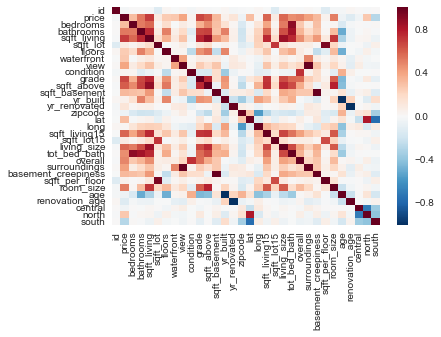

In [17]:
houseData.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)
featHouseData = pd.concat([houseData,features], axis=1)
sns.heatmap(featHouseData.corr())
plt.show()
#featHouseData.head()

In [27]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(houseData['sqft_living'])
print(scaler.transform(houseData['sqft_living']))

[ 0.06716981  0.17207547  0.03622642 ...,  0.05509434  0.09886792
  0.05509434]


C:\Users\spenser\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\spenser\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\spenser\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


    Using low correlation as our filtering method, we will get rid of sqft_per_floor, age, renovation age, region, and basement_creepiness.